In [171]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/Cyber_Threat_Detection.csv')
df.head()
df.shape
data_cols=df.columns.tolist()
print(data_cols)
df.dtypes
df.describe()
df.info()
df.drop(columns=['Activity_ID','Activity_Time'],inplace=True)
df.info()
print(data_cols)

['Activity_ID', 'Source_IP', 'Destination_IP', 'Protocol', 'Port', 'Bytes_Transferred', 'Connection_Type', 'User_Agent', 'Activity_Time', 'Threat_Level']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Activity_ID        700 non-null    object 
 1   Source_IP          674 non-null    object 
 2   Destination_IP     700 non-null    object 
 3   Protocol           700 non-null    object 
 4   Port               665 non-null    float64
 5   Bytes_Transferred  675 non-null    float64
 6   Connection_Type    700 non-null    object 
 7   User_Agent         700 non-null    object 
 8   Activity_Time      700 non-null    object 
 9   Threat_Level       700 non-null    int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 54.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Source_IP          674 non-null    object 
 1   Destination_IP     700 non-null    object 
 2   Protocol           700 non-null    object 
 3   Port               665 non-null    float64
 4   Bytes_Transferred  675 non-null    float64
 5   Connection_Type    700 non-null    object 
 6   User_Agent         700 non-null    object 
 7   Threat_Level       700 non-null    int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 43.9+ KB


In [ ]:
df.isnull().sum()

,0
Source_IP,26
Destination_IP,0
Protocol,0
Port,35
Bytes_Transferred,25
Connection_Type,0
User_Agent,0
Threat_Level,0


In [ ]:
if 'Activity_ID' in df.columns and 'Activity_Time' in df.columns:
    df.drop(columns=['Activity_ID', 'Activity_Time'], inplace=True)
else:
    print("Columns 'Activity_ID' and/or 'Activity_Time' already dropped.")

Columns 'Activity_ID' and/or 'Activity_Time' already dropped.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Source_IP          674 non-null    object 
 1   Destination_IP     700 non-null    object 
 2   Protocol           700 non-null    object 
 3   Port               665 non-null    float64
 4   Bytes_Transferred  675 non-null    float64
 5   Connection_Type    700 non-null    object 
 6   User_Agent         700 non-null    object 
 7   Threat_Level       700 non-null    int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 43.9+ KB


In [ ]:
if 'User_Agent' in df.columns and 'Bytes_Transferred' in df.columns:
    df.drop(columns=['User_Agent', 'Bytes_Transferred'], inplace=True)
else:
    print("Columns 'User_Agent' and/or 'Bytes_Transferred' already dropped.")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Source_IP        674 non-null    object 
 1   Destination_IP   700 non-null    object 
 2   Protocol         700 non-null    object 
 3   Port             665 non-null    float64
 4   Connection_Type  700 non-null    object 
 5   Threat_Level     700 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 32.9+ KB


In [172]:
num_columns = df.select_dtypes(include=['float64']).columns

In [ ]:
cat_columns = df.select_dtypes(include=['object']).columns

In [ ]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())

In [ ]:
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])

In [ ]:
 df.isnull().sum()

,0
Source_IP,0
Destination_IP,0
Protocol,0
Port,0
Connection_Type,0
Threat_Level,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for column in cat_columns:
  df[column] = le.fit_transform(df[column])

In [ ]:
df

,Source_IP,Destination_IP,Protocol,Port,Connection_Type,Threat_Level
0,576,70,0,6353.000000,0,1
1,508,293,0,55777.000000,1,1
2,87,328,0,52094.000000,0,1
3,661,455,2,33262.221053,0,0
4,78,472,2,19970.000000,0,0
...,...,...,...,...,...,...
695,559,259,0,33262.221053,1,0
696,408,464,2,9931.000000,1,0
697,316,225,1,57641.000000,1,1
698,160,611,1,10909.000000,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [ ]:
df

,Source_IP,Destination_IP,Protocol,Port,Connection_Type,Threat_Level
0,576,70,0,0.082554,0,1
1,508,293,0,0.849067,1,1
2,87,328,0,0.791948,0,1
3,661,455,2,0.499887,0,0
4,78,472,2,0.293739,0,0
...,...,...,...,...,...,...
695,559,259,0,0.499887,1,0
696,408,464,2,0.138045,1,0
697,316,225,1,0.877976,1,1
698,160,611,1,0.153213,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cat_columns] = scaler.fit_transform(df[cat_columns])

In [ ]:
df

,Source_IP,Destination_IP,Protocol,Port,Connection_Type,Threat_Level
0,0.855869,0.100143,0.0,0.082554,0.0,1
1,0.754829,0.419170,0.0,0.849067,1.0,1
2,0.129272,0.469242,0.0,0.791948,0.0,1
3,0.982169,0.650930,1.0,0.499887,0.0,0
4,0.115899,0.675250,1.0,0.293739,0.0,0
...,...,...,...,...,...,...
695,0.830609,0.370529,0.0,0.499887,1.0,0
696,0.606241,0.663805,1.0,0.138045,1.0,0
697,0.469539,0.321888,0.5,0.877976,1.0,1
698,0.237741,0.874106,0.5,0.153213,1.0,0


In [ ]:
X = df.drop('Threat_Level', axis=1)

In [ ]:
y = df['Threat_Level']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

In [ ]:
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)

Random Forest Accuracy: 0.55
Random Forest Confusion Matrix:
 [[46 22]
 [41 31]]


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)

Logistic Regression Accuracy: 0.5142857142857142
Logistic Regression Confusion Matrix:
 [[54 14]
 [54 18]]


In [175]:
 from sklearn.tree import plot_tree
 import matplotlib.pyplot as plt

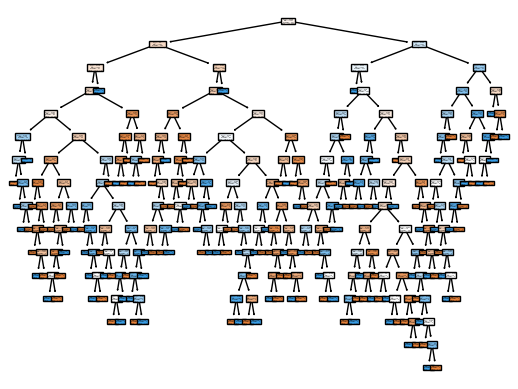

In [176]:
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [177]:
best_model = logreg_model if logreg_accuracy > rf_accuracy else rf_model

In [178]:
import pickle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
print("best model saved as 'best_model.pkl'")

best model saved as 'best_model.pkl'
